In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [50]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [53]:
#Load Data
titanic_data = pd.read_csv('train.csv')

In [54]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#First lets do EDA

In [61]:
from pycaret.classification import *
exp1 = setup(titanic_data, target = 'Survived')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3232
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.818800,0.844800,0.711600,0.792700,0.747500,0.607600
1,Ridge Classifier,0.818600,0.000000,0.715200,0.792500,0.747800,0.607500
2,Logistic Regression,0.817100,0.863700,0.727500,0.784400,0.750200,0.606700
3,Gradient Boosting Classifier,0.813800,0.858700,0.686400,0.806300,0.738100,0.595400
4,Light Gradient Boosting Machine,0.805900,0.863700,0.716100,0.763800,0.736100,0.583500
5,Decision Tree Classifier,0.802700,0.780700,0.686400,0.777000,0.726600,0.573500
6,CatBoost Classifier,0.801100,0.859500,0.644600,0.800900,0.710200,0.562400
7,Extra Trees Classifier,0.791300,0.848000,0.673700,0.754000,0.708500,0.547800
8,Ada Boost Classifier,0.789600,0.845700,0.707100,0.739000,0.716200,0.550300
9,Random Forest Classifier,0.776800,0.830600,0.585900,0.778000,0.662500,0.503100


In [65]:
xgb=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8730,0.9359,0.8333,0.8333,0.8333,0.7308
1,0.6508,0.7329,0.3750,0.5625,0.4500,0.2089
2,0.8413,0.8526,0.7083,0.8500,0.7727,0.6523
3,0.8387,0.8761,0.7083,0.8500,0.7727,0.6493
4,0.8548,0.9024,0.7917,0.8261,0.8085,0.6917
5,0.8548,0.8257,0.7500,0.8571,0.8000,0.6869
6,0.7419,0.7407,0.6250,0.6818,0.6522,0.4477
7,0.7742,0.8235,0.7500,0.6923,0.7200,0.5313
8,0.8548,0.8350,0.7917,0.8261,0.8085,0.6917
9,0.9032,0.9236,0.7826,0.9474,0.8571,0.7850


In [66]:
tuned_xgb=tuned_dt = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.9509,0.7500,0.8182,0.7826,0.6580
1,0.6825,0.7115,0.5000,0.6000,0.5455,0.3046
2,0.8413,0.9017,0.7083,0.8500,0.7727,0.6523
3,0.8226,0.8925,0.6667,0.8421,0.7442,0.6112
4,0.8548,0.9145,0.7917,0.8261,0.8085,0.6917
5,0.8226,0.8246,0.7500,0.7826,0.7660,0.6232
6,0.7742,0.7884,0.6667,0.7273,0.6957,0.5167
7,0.7742,0.8388,0.7500,0.6923,0.7200,0.5313
8,0.8548,0.8366,0.7083,0.8947,0.7907,0.6819
9,0.9032,0.9158,0.8261,0.9048,0.8636,0.7889


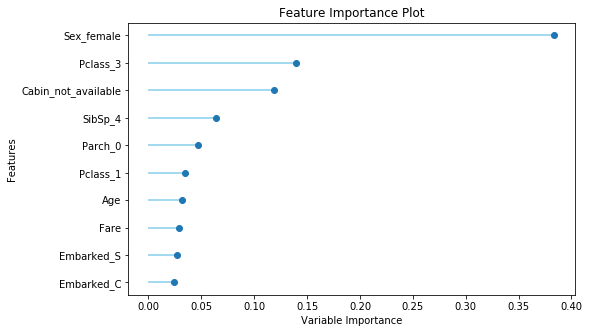

In [67]:
#AS we can see most valuable feature is 'sex'
plot_model(xgb, plot='feature')

In [69]:
#Make predictions 
predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8396,0.8853,0.767,0.8061,0.7861,0.6578


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Abbott Mr. Rossmore Edward,Name_Abbott Mrs. Stanton (Rosa Hunt),Name_Abelson Mr. Samuel,Name_Abelson Mrs. Samuel (Hannah Wizosky),Name_Adahl Mr. Mauritz Nils Martin,...,Cabin_F G73,Cabin_F33,Cabin_G6,Cabin_not_available,Embarked_C,Embarked_Q,Embarked_S,Survived,Label,Score
0,7.000000,39.6875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1025
1,41.000000,19.5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.7610
2,29.699118,89.1042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9819
3,20.000000,9.5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1135
4,9.000000,46.9000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.2536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,29.000000,66.6000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.5652
264,23.000000,13.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1081
265,27.000000,76.7292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.5380
266,21.000000,8.6625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1135


In [71]:
#Finalizing model (use test data)
final_xgb = finalize_model(xgb)

In [72]:
print(final_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3232,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


In [73]:
predict_model(final_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8881,0.9383,0.8252,0.8763,0.85,0.7608


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Abbott Mr. Rossmore Edward,Name_Abbott Mrs. Stanton (Rosa Hunt),Name_Abelson Mr. Samuel,Name_Abelson Mrs. Samuel (Hannah Wizosky),Name_Adahl Mr. Mauritz Nils Martin,...,Cabin_F G73,Cabin_F33,Cabin_G6,Cabin_not_available,Embarked_C,Embarked_Q,Embarked_S,Survived,Label,Score
0,7.000000,39.6875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.0627
1,41.000000,19.5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.8816
2,29.699118,89.1042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9729
3,20.000000,9.5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1094
4,9.000000,46.9000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,29.000000,66.6000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.3685
264,23.000000,13.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1105
265,27.000000,76.7292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.5578
266,21.000000,8.6625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1094


In [74]:
#Data for submission to kaggle
test_data = pd.read_csv('test.csv')

In [77]:
test_predictions=predict_model(final_xgb, data=test_data)
test_predictions.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0646
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2909
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0610
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1146
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4172
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0.1181
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,0.6110
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0.1113
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0.7604
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0.0966


In [79]:
submit=test_predictions.drop(['Name','Pclass','Sex','Ticket','Age','SibSp','Ticket','Fare','Cabin','Embarked','Score','Parch'],axis=1)
submit.head()

,PassengerId,Label
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [85]:
submit=submit.rename(columns={"Label": "Survived"})

In [83]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    df.to_csv(csv_file_name, index=False)
    from IPython.display import FileLink
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        import os
        os.remove(csv_file_name)

In [86]:
csv_download_link(submit, 'submit.csv')

C:\Users\PC\submit.csv

Press enter to delete the file after you have downloaded it.
